In [32]:
%pip install scipy matplotlib numpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

FILE_NAME = 'Q100_100_100R_0_04.mat'

# Load the MATLAB file
data = scipy.io.loadmat(FILE_NAME)

# Display the keys to see what variables are in the file
print("Variables in the .mat file:")
for key in data.keys():
    if not key.startswith('__'):
        print(f"- {key}: shape {data[key].shape if hasattr(data[key], 'shape') else type(data[key])}")

Variables in the .mat file:
- ans: shape (8, 9435)


IndexError: index 3 is out of bounds for axis 0 with size 3

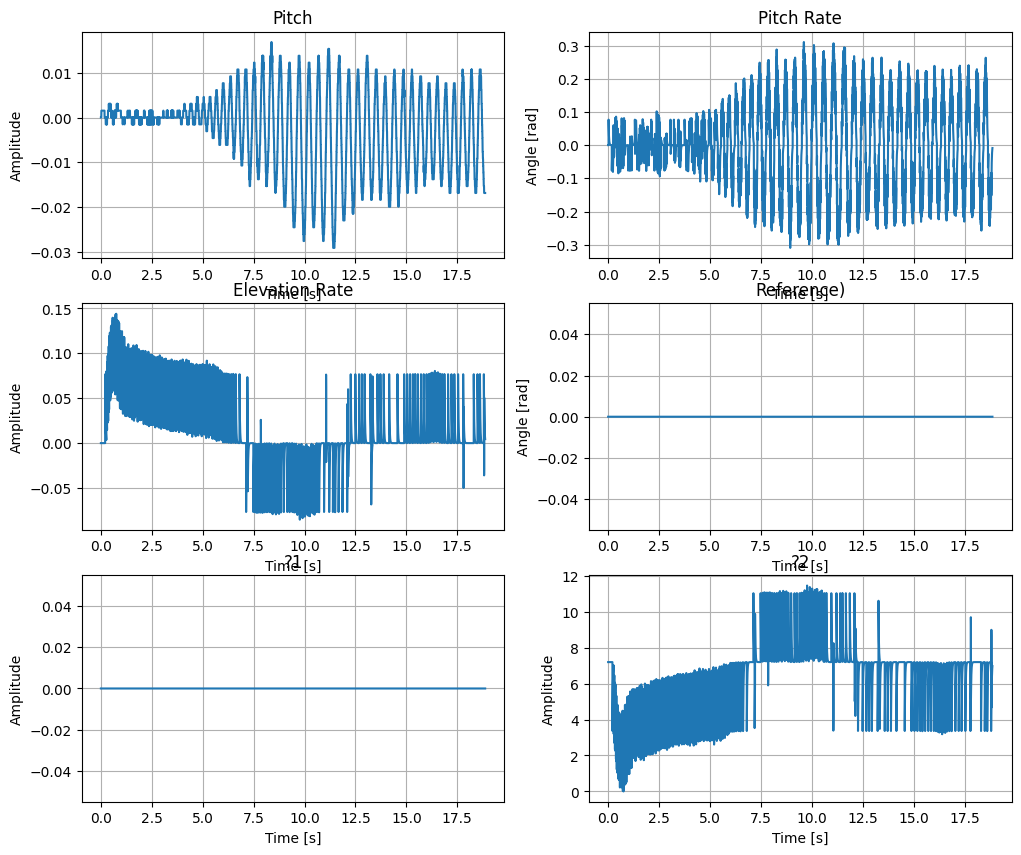

In [7]:
# Plot the data
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Extract the data
signal_data = data['ans']

# Plot each row as a separate signal
labels = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'Reference)', '?1', '?2', '?3']

for i in range(8):
    if i == 0:
        # Skip time for individual plots, we'll use it as x-axis
        continue
    
    ax_idx = i - 1
    ax = axes[ax_idx // 2, ax_idx % 2]
    
    # Use time as x-axis if available
    time = signal_data[0, :]
    signal = signal_data[i, :]
    
    ax.plot(time, signal)
    ax.set_title(labels[i])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [rad]' if i in [2, 4] else 'Amplitude')
    ax.grid(True)

# Combined plot in the last subplot
ax = axes[2, 0]
ax.plot(time, signal_data[2, :], label='Pitch', linewidth=2)
ax.plot(time, signal_data[4, :], label='Elevation', linewidth=2)
ax.set_title('Helicopter Angles')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [rad]')
ax.legend()
ax.grid(True)

# Hide the empty subplot
# axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [35]:
# Export the figure
import os

# Create figures directory if it doesn't exist
figures_dir = './figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Save the figure
fig.savefig(f'{figures_dir}/{FILE_NAME}.png', dpi=300, bbox_inches='tight')
print(f"Figure saved to {figures_dir}/{FILE_NAME}.png")

Figure saved to ./figures/minus2minus5.mat.png
